# Logistic Regression

Logistic regression is a type of supervised machine learning algorithm used for binary classification tasks, where the dependent variable can take only two possible outcomes (e.g., yes/no, true/false). It aims to predict the probability of an event occurring based on input features. Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities between 0 and 1, representing the likelihood of the positive class.

The algorithm uses the logistic function (sigmoid) to transform the linear combination of input features and their corresponding coefficients into probabilities. The sigmoid function maps any real number to a value in the range (0, 1), making it ideal for probability estimation.

The key assumption of logistic regression is that the relationship between the independent variables and the log odds of the outcome is linear. This assumption enables the algorithm to model the probability of the event occurring.

To train the logistic regression model, a cost function, typically the log-loss (cross-entropy), is minimized. The log-loss quantifies the difference between predicted probabilities and the actual binary outcomes, driving the model to make accurate predictions.

The coefficients obtained during model training represent the log odds of the outcome associated with each predictor variable. A positive coefficient indicates a positive relationship with the log odds of the event occurring, while a negative coefficient suggests a negative relationship.

Interpreting the coefficients allows us to understand the impact of each predictor on the outcome. Higher positive coefficients imply stronger positive influence, while higher negative coefficients imply stronger negative influence.

Logistic regression assumes that the observations are independent and that there is no perfect multicollinearity among the predictor variables. It also requires a sufficiently large sample size for stable estimates.

In cases where multicollinearity exists, regularization techniques like L1 (Lasso) and L2 (Ridge) can be applied to control the model's complexity and reduce overfitting.

Logistic regression can be extended to handle multi-class classification problems using techniques like one-vs-rest (OvR) or softmax regression (multinomial logistic regression).

Model evaluation is typically done using metrics such as accuracy, precision, recall, specificity, and the F1-score, which help assess the performance of the classifier.

The receiver operating characteristic (ROC) curve and the area under the curve (AUC) are also used to visualize and compare different models' performance.

Logistic regression can handle high-dimensional datasets and is particularly effective when the classes are linearly separable.

However, it may not perform well on datasets with complex non-linear relationships, and its performance may be limited if the assumptions of the model are violated.

Logistic regression finds applications in various fields, such as medicine (e.g., disease prediction), marketing (e.g., customer churn prediction), finance (e.g., credit risk assessment), and more.

It is relatively easy to implement and computationally efficient, making it a popular choice for many binary classification problems.

The choice of features and data preprocessing play a crucial role in the performance of logistic regression models.

Outliers can have a significant impact on the model's performance and may require appropriate handling.

Addressing class imbalance is essential for improving the model's ability to correctly predict the minority class.

Regularization is a useful technique to prevent overfitting and enhance the model's generalization ability to unseen data.

In summary, logistic regression is a fundamental and widely used algorithm in machine learning for binary classification tasks. It models the probability of an event occurring based on input features, allowing us to make informed decisions and predictions in various real-world applications.

## Sigmoid Function    

It looks like 
![Sigmoid Function](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png)


As we can see, peak tries to reach 1 and bottom tries to reach 0.  
- As z goes towards ->   ${-\infty}$, $e^{-z}$ goes towards -> ${\infty}$,  
   and S will go towards 0.
- As z goes towards -> ${\infty}$, $e^{-z}$ which is $e^{-\infty}$ -> 0,   
   so S goes towards 1/1 which is 1
- When z = 0, it is at origin which is 0.5

So we need to exploit sigmoid function in logistic regression.  

###### In Logistic Regression, our output will actually be 

\begin{equation*}
h(x) = \frac{1}{1 + e^{-g(x)}}
\end{equation*}

where $g(x) = mx + c$ Which is linear regression line.  
Lets say we have features x1 x2 and x3, so it will be like m1x1, m2x2 and m3x3.  
And lets say we going to add extra $x_{n+1}$ which is basically 1.  
So we can say that above equation is $m^{T}x$ where T is Transpose,  
where m is effectively, [$m_{1}$, $m_{2}$, ... $m_{n}$] and $m_{n}$ (last element of m)is c,  
and x is [$x_{1}$, $x_{2}$, 1] where last is extra 1.  

  
  
So our predictions will be,  

\begin{equation*}
h(x) = \frac{1}{1 + e^{-m^{T}x}}
\end{equation*}  

lets say if **h(x)  >  0.5, ypred = 1, and h(x) <= 0.5, ypred = 0**.  

Now what does $\frac{1}{1 + e^{-z}}$ = 0.5 mean?
we have seen if z > 0 -> s(z) > 0.5,  
    if z <= 0, s(z) <= 0.  

If $m^{T}x$  > 0, h(x) > 0.5, ypred -> 1.  
If $m^{T}x$  <= 0, h(x) <= 0.5, ypred -> 0.    

---

Now we have sigmoid function and we need to find the parameters.Parameters are..

lets say the hypothesis is  $$ h(x) = s(m^{T}x)  \frac{1}{1 + e^{-g(x)}}$$ .  
What we need is we need to find the m.The best fit m such that error is minimized.  
  
    
      
How do we define the error function?
The error function depends upon the output, and the actual Y(prediction) = E(h(x), y).  

So the error fuction in linear regression looks like  $$\sum_{i = 1}^{m} (y^{i} - h(x))^2$$  
where **h(x) = $m^{T}x$.** 
  
But now, **h(x)** is $$\frac{1}{1 + e^{-g(x)}}$$ which is complicated.  
And for this **h(x)** if we use the same error function(linear regression one) it creates problems.  
The problem it creates is there is many local minimas.  
Instead of using this error function, we need to use the error function so that for $$\frac{1}{1 + e^{-g(x)}}$$  it should be convex.  
Convex function means there will be only one local minima.  
So instead of using error function as $$\sum_{i = 1}^{m} (y^{i} - h(x))^2$$ we will use a different one.  
So our function will be splitted into two parts.  

```python
    if y == 1:  
        E(h(x), y) =  -log(h(x))
    else:  
        E(h(x), y) =  -log(1 - h(x))
```

  
    
For a particular data,  

if y == 1:    
\   $E(h(x^i), y^i) ->  -log(h(x^i))$  
else:    
\   $E(h(x^i), y^i) ->  -log(1 - h(x^i))$  


----

In a simplified form, we can combine the both equations in the form,  
$$E(h(x^i), y^i) = -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$ 

This is the error function of ith training data.  

So overall error on whole x and y data willbe  
$$E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   
We did a small change by adding $\frac{1}{m}$ because training data is huge so that our error must not become huge we are kind of finding average error per training data point.  
This error function is convex.


----

Now that we have found our error function to be  

$$E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   

What we want to do is we want to find the optimal m values. To do so, we are planning to use gradient descent as we have done earlier.  j
The idea of gradient descent is lets start with particular value of m, lets update m.To update particular m we use  
$$m_{j} = m_{j} - \alpha \frac{\partial E}{\partial m_{j}}$$.  

Now to find  $\frac{\partial E}{\partial m_{j}}$, we need to calculate $\frac{\partial E(x, y, m)}{\partial m_{j}}$
where this is also dependent upon x.
What we are supposed to do is we are supposed to take derivative of $$E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$ w.r.t particular parameter which is $ \frac{1}{1+e^{m^T_x}}$

----

So our error function was  
$$E(m) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   


Before we try to differentiate this, lets check what is $log(h(x^i))$  
  
   
$$log(h(x^i)) = \frac{1}{1 + e^{-m^{T}x^{i}}}$$

Now using **log(a/b)** property, we get =  
$$ log(1) - log(1 + e^{-m^{T}x^{i}}) \quad = \quad -log(1 + e^{-m^{T}x^{i}})   \quad               .......... (1)  $$  

$\quad$
  
    
Now what is $log(1 - h(x^i))$   
  
$$log(1 - h(x^i)) =  log(1 - \frac{1}{1 + e^{-m^{T}x^{i}}})$$  

$log(1 - \frac{1}{1 + e^{-m^{T}x^{i}}})$  can be simplified into  

$$ log(e^{-m^{T}x^{i}}) - log(1+ e^{-m^{T}x^{i}})\quad..........(2)$$ 


Now, lets put (1) and (2) in error function, we get, 
For now, we are not assuming $\frac{1}{m}$, we are focusing on internal part  

$$E(m) = -y^i(-log(1+ e^{-m^{T}x^{i}})) - (1-y^i)log(e^{-m^{T}x^{i}}) - log(1+ e^{-m^{T}x^{i}})$$    
solving the above equation,  
$$ E(m) = y^ilog(e^{-m^{T}x^{i}}) - log(e^{-m^{T}x^{i}}) + log(1+ e^{-m^{T}x^{i}}) + y^ilog(e^{-m^{T}x^{i}}) - y^ilog(1+e^{-m^{T}x^{i}})$$   
$$ = {m^{T}x^{i}} + y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}})  \quad ........ since \ loge^z = z$$
  
$\quad$   
      
        

$$ E^i(m)= {m^{T}x^{i}} + y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) $$ 


  ----
  
  $$E^i(m) = {m^{T}x^{i}} - y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) $$ 
  
  $\qquad$
The above is the equation we derived for ith value , so lets simplify further.  
$$ = log{m^{T}x^{i}} - y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) $$
$\quad$
$$ = log{1 + e^{m^{T}x^{i}}} - y^i(m^{T}x^{i})  \quad  \scriptsize{ ............. \ using \ loga +  logb = log(a+b)}
$$  
  
    
Now lets find what is $\frac{\partial E^i(m)}{\partial m_{j}}$,   

before differentiating, lets find what is $y^i(m^{T}x^{i})$, 

$y^i(m^{T}x^{i}) = y^i \sum_{j}m_{j}x_{j}^i$ this basically means for all the parameters, my ith training datapoint.

Now differentiating,  
$$\frac{\partial E^i (m)}{\partial m_{j}} = \frac{1}{1+e^{m^{T}x^{i}}} * e^{m^{T}x^{i}} * x_{j}^i  - y_{i}x_{j}^i$$  
$$ = -(y^i - \frac{1}{1+e^{m^{T}x^{i}}} * e^{m^{T}x^{i}}) * x_{j}^i   \quad \scriptsize { \ ......... took \ minus \ sign \ and \ x_{j}^i \ common.}  $$
Now, dividing numerator and denominator by $e^{m^{T}x^{i}})$, we get

$$  = -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $$   

Now, if we look carefully, $\frac{1}{1+e^{-m^{T}x^{i}}}$ = $h(x_{i})$,    
  

So, $\frac{\partial E^i(m)}{\partial m_{j}} = -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $ this is the error looks like for ith training data point. 
$\quad$

For Complete data, 
$$ \frac{\partial E(m)}{\partial m_{j}} = \frac{1}{m} \sum_{i=1} -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $$  
As we have learned Gradient descent before, we need to find,  
$$m_{j} = m_{j} - \alpha \frac{\partial E(m)}{\partial m_{j}} $$

### LR from Scratch


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,preprocessing

breast_cancer = datasets.load_breast_cancer()

breast_cancer.DESCR.split("\n")

X = breast_cancer.data
Y = breast_cancer.target

X_df = pd.DataFrame(X)
X_df.describe()

from sklearn import model_selection

X_train,X_val,Y_train,Y_val = model_selection.train_test_split(X,Y)

scaler = preprocessing.StandardScaler()


scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)


X_train_scaled.shape


#### Inserting column of ones in dataset

X_train_scaled = np.append(X_train_scaled,np.ones(X_train_scaled.shape[0]).reshape(-1,1),axis=1)


X_train_scaled.shape,X_train_scaled[0].shape


((426, 31), (31,))

In [2]:
def sigmoid(agg):
    return 1/(1+np.exp(-agg))

In [3]:
def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

In [4]:
def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

In [5]:
def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//100
    for i in range(epochs):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array

In [6]:
def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

In [7]:
def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [8]:
m,cost_array = fit(X_train_scaled,Y_train,5000,0.01)
print(m)

Epoch:0, Cost:287.3949631395047
Epoch:50, Cost:144.58017433787987
Epoch:100, Cost:110.31433155433054
Epoch:150, Cost:93.55460361835422
Epoch:200, Cost:83.20104518787481
Epoch:250, Cost:76.02837005213217
Epoch:300, Cost:70.70378187007415
Epoch:350, Cost:66.56056441287038
Epoch:400, Cost:63.223539108330066
Epoch:450, Cost:60.46394108635781
Epoch:500, Cost:58.133762055777794
Epoch:550, Cost:56.13270998739433
Epoch:600, Cost:54.390237971778866
Epoch:650, Cost:52.85516313382668
Epoch:700, Cost:51.489371178056075
Epoch:750, Cost:50.263840962337774
Epoch:800, Cost:49.156046362304984
Epoch:850, Cost:48.148207238480744
Epoch:900, Cost:47.22608123172834
Epoch:950, Cost:46.378109994110574
Epoch:1000, Cost:45.59480361581722
Epoch:1050, Cost:44.86828874900164
Epoch:1100, Cost:44.19197150352009
Epoch:1150, Cost:43.56028227464229
Epoch:1200, Cost:42.96848002060837
Epoch:1250, Cost:42.412500321134274
Epoch:1300, Cost:41.88883611708942
Epoch:1350, Cost:41.39444315026672
Epoch:1400, Cost:40.926664285538

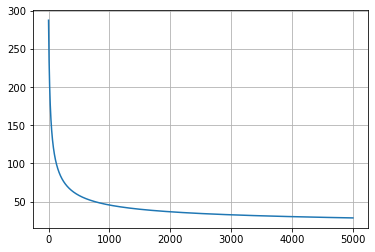

In [9]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [10]:
y_pred_train = predict(X_train_scaled,m)


In [11]:
accuracy(Y_train,y_pred_train)

X_val_scaled = scaler.transform(X_val)

X_val_scaled = np.append(X_val_scaled,np.ones(X_val_scaled.shape[0]).reshape(-1,1),axis=1)

y_pred_val = predict(X_val_scaled,m)

accuracy(Y_val,y_pred_val)

99.3006993006993

## LR for NLP

Steps:
- Suppose you have Positive and Negative tweet, first prepare a vocabulary of all the sentences in corpus. 
- Then add the frequency of positive and Negative frequency of words in the corpus. It will look like for following sentence
```python
"I am happy because i am learning NLP"
 "I am sad because i am not learning NLP"
```

| Vocabulary | PosFreq(1)  | NegFreq(0)  |
|------------|-------------|-------------|
| am         | 2           | 2           |
| because    | 2           | 2           |
| happy      | 1           | 0           |
| I          | 2           | 2           |
| learning   | 1           | 1           |
| NLP        | 1           | 1           |
| not        | 0           | 1           |
| sad        | 0           | 1           |

- Create Dictionary in the following way.  $$X_m = [1, \quad \sum_{w}freqs(w, 1), \quad \sum_{w}freqs(w, 0) ]$$ of where 1 is bias, second is count of freq of words in positive tweet, second is for negative and w is word.  

- So for the above corpus, $X_m$ will look like $$X_m = [1, 8, 11]$$
- Preprocess handles, urls, stopwords and punctuations from the sentence.  
- Perform Stemming and Lemmatization as well.   
So for n sentences, the whole data looks like 
$[1, X_{1}^1, X_{2}^2]$

- Training LR  
  
<img src= "https://editor.analyticsvidhya.com/uploads/29525YGmjEyR0Sw2poxMkdBsNeQ_74cb9a1075fb4d1eb835b14a8d5b2456_Screen-Shot-2020-09-01-at-8.39.39-AM.png" width="650"/>

- Find the accuracy 
<img src= "https://editor.analyticsvidhya.com/uploads/94665xq8RYoHvROKvEWKB73TiUg_ac2e78d0c6654f58ab40822d08b68465_Screen-Shot-2020-09-02-at-10.47.33-AM.png" width="650"/>

check more at [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/11/create-a-pipeline-to-perform-sentiment-analysis-using-nlp/) and check NLP course 1 Notes

# Questions
`1. Question: What is logistic regression?`  
   Answer: Logistic regression is a supervised machine learning algorithm used for binary classification tasks, where the dependent variable takes only two possible outcomes. It predicts the probability of an event occurring based on input features using the logistic function. 
   
   ---

`2. Question: How does logistic regression differ from linear regression?`  
   Answer: While both regression methods deal with predicting outcomes, linear regression is used for continuous dependent variables, whereas logistic regression is used for discrete binary outcomes. Linear regression produces continuous values, while logistic regression outputs probabilities in the range (0, 1).
   
   ---

`3. Question: What is the logistic function (sigmoid function)?`  
   Answer: The logistic function, also known as the sigmoid function, is given by f(x) = 1 / (1 + e^(-x)). It maps any real number to a value between 0 and 1, making it suitable for converting linear combinations of features and coefficients to probabilities in logistic regression.
   
   ---

`4. Question: What are the assumptions of logistic regression?`  
   Answer: The main assumptions of logistic regression are linearity between the log odds of the outcome and the predictors, independence of observations, absence of multicollinearity, and a large enough sample size for stable estimates.
   
   ---

`5. Question: How do you interpret the coefficients in logistic regression?`  
   Answer: In logistic regression, the coefficients represent the log odds of the outcome associated with each predictor variable. A positive coefficient indicates a positive relationship with the log odds of the event occurring, while a negative coefficient suggests a negative relationship.
   
   ---

`6. Question: What is the logit function in logistic regression?`  
   Answer: The logit function is the inverse of the logistic function and is used to convert probabilities back to the log odds scale. It is given by g(p) = ln(p / (1 - p)), where 'p' is the probability of the event occurring.
   
   ---

`7. Question: How is the cost function (log-loss) used in logistic regression model training?`  
   Answer: The log-loss (cross-entropy) function is used as the cost function in logistic regression to quantify the difference between predicted probabilities and the actual binary outcomes. The goal during training is to minimize this loss, adjusting the model's parameters (coefficients) accordingly.
   
   ---

`8. Question: How do you evaluate the performance of a logistic regression model?`  
   Answer: Common evaluation metrics for logistic regression include accuracy, precision, recall (sensitivity), specificity, and the F1-score. The receiver operating characteristic (ROC) curve and area under the curve (AUC) are also used to assess model performance.
   
   ---

`9. Question: How do you handle multicollinearity in logistic regression?`  
   Answer: Multicollinearity occurs when predictor variables are highly correlated. To address this, one can use techniques such as removing correlated features, using dimensionality reduction methods, or applying regularization (e.g., L1 or L2 regularization).

`10. Question: How do you handle class imbalance in logistic regression?`  
    Answer: Class imbalance occurs when one class has significantly more samples than the other. Techniques to address this issue include resampling methods (e.g., oversampling the minority class or undersampling the majority class) or using cost-sensitive learning algorithms that penalize misclassification of the minority class more heavily.
    
    ---

`11. Question: Can logistic regression be used for multi-class classification? If so, how?`   
    Answer: Yes, logistic regression can be extended to handle multi-class classification using techniques like one-vs-rest (OvR) or softmax regression (multinomial logistic regression). OvR trains multiple binary classifiers, one for each class against the rest, while softmax regression generalizes logistic regression for multiple classes.  
    
    ---
    
`12. Question: What are some common regularization techniques used in logistic regression?`  
    Answer: Regularization helps prevent overfitting. Common techniques include L1 regularization (Lasso), which adds the absolute value of the coefficients to the cost function, and L2 regularization (Ridge), which adds the square of the coefficients. Regularization controls the magnitude of coefficients and helps avoid excessive influence from individual features.  
    
    ---

`13. Question: Explain the process of feature selection in logistic regression.`  
    Answer: Feature selection involves choosing the most relevant features to improve model performance and reduce complexity. Techniques include univariate feature selection (e.g., using statistical tests like chi-square), recursive feature elimination, and regularization-based methods that automatically select important features during model training.  
    
    ---

`14. Question: What is stepwise logistic regression, and what are its advantages and disadvantages?`  
    Answer: Stepwise logistic regression is an automated feature selection method that sequentially adds or removes features based on their statistical significance. Advantages include its simplicity and ability to handle large feature sets. However, it may lead to overfitting and lacks robustness compared to other feature selection approaches.  
    
    ---

`15. Question: How do you deal with outliers in logistic regression?`  
    Answer: Outliers can have a significant impact on logistic regression models. Possible approaches include removing outliers, transforming the variables, or using robust logistic regression techniques that are less influenced by extreme values.

---

`16. Question: Explain the concept of cross-entropy in the context of logistic regression.`
    Answer: Cross-entropy, also known as log-loss, measures the dissimilarity between predicted probabilities and the actual binary outcomes. It quantifies the information loss between the predicted and true probability distributions, and the aim during model training is to minimize this loss to improve the model's accuracy.
    
    ---

`17. Question: What is the difference between accuracy and precision in logistic regression evaluation?`
    Answer: Accuracy measures the overall correctness of predictions, considering both true positives and true negatives. Precision, on the other hand, measures the proportion of correctly predicted positive cases (true positives) out of all predicted positive cases, and it helps assess the model's performance in correctly identifying positive instances.

  ---
  
`18. Question: How is the ROC curve analysis useful in assessing logistic regression models?`
    Answer: The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various probability thresholds. It helps visualize the trade-off between sensitivity and specificity and allows comparison of different models based on their AUC values, which represents the overall performance of the classifier.

---

`19. Question: What are the advantages and disadvantages of logistic regression?`
    Answer: Advantages of logistic regression include its simplicity, fast training, and interpretability of coefficients. It is effective for linearly separable data and can handle high-dimensional datasets. However, logistic regression may not perform well on complex datasets with non-linear relationships, and its performance may be limited when assumptions are not met.
    
  ---

`20. Question: Can you explain the concept of regularization in logistic regression?`
    Answer: Regularization in logistic regression adds penalty terms to the cost function to control the magnitude of coefficients. L1 regularization (Lasso) adds the sum of the absolute values of coefficients, promoting sparsity by setting some coefficients to exactly zero. L2 regularization (Ridge) adds the sum of the squared coefficients, shrinking them towards zero without eliminating any. Regularization prevents overfitting and helps improve the model's generalization ability.